# Model performance on Test dataset

In [1]:
import cv2
import matplotlib.image as img
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.metrics import classification_report
import numpy as np
from libs.preprocessing import ImageToArrayPreprocessor
from libs.preprocessing import SimplePreprocessor
import pandas as pd
import os

2023-02-17 19:16:03.717387: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-17 19:16:04.138410: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/viv/miniconda3/envs/German_Traffic_Sign_Recognition/lib/python3.10/site-packages/cv2/../../lib64::/home/viv/miniconda3/lib/
2023-02-17 19:16:04.138449: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 

In [2]:
SAVED_MODEL_PATH = 'model/ge_traffic_sign_recognition.h5'
DATASET_DIR = './gtsrb-german-traffic-sign'
TEST_CSV = f'{DATASET_DIR}/Test.csv'
BATCH_SIZE = 32
IMG_WIDTH = IMG_HEIGHT = 32
RANDOM_STATE=42

In [3]:
classes = {0: 'Speed limit (20km/h)',
           1: 'Speed limit (30km/h)',
           2: 'Speed limit (50km/h)',
           3: 'Speed limit (60km/h)',
           4: 'Speed limit (70km/h)',
           5: 'Speed limit (80km/h)',
           6: 'End of speed limit (80km/h)',
           7: 'Speed limit (100km/h)',
           8: 'Speed limit (120km/h)',
           9: 'No passing',
           10: 'No passing veh over 3.5 tons',
           11: 'Right-of-way at intersection',
           12: 'Priority road',
           13: 'Yield',
           14: 'Stop',
           15: 'No vehicles',
           16: 'Veh > 3.5 tons prohibited',
           17: 'No entry',
           18: 'General caution',
           19: 'Dangerous curve left',
           20: 'Dangerous curve right',
           21: 'Double curve',
           22: 'Bumpy road',
           23: 'Slippery road',
           24: 'Road narrows on the right',
           25: 'Road work',
           26: 'Traffic signals',
           27: 'Pedestrians',
           28: 'Children crossing',
           29: 'Bicycles crossing',
           30: 'Beware of ice/snow',
           31: 'Wild animals crossing',
           32: 'End speed + passing limits',
           33: 'Turn right ahead',
           34: 'Turn left ahead',
           35: 'Ahead only',
           36: 'Go straight or right',
           37: 'Go straight or left',
           38: 'Keep right',
           39: 'Keep left',
           40: 'Roundabout mandatory',
           41: 'End of no passing',
           42: 'End no passing veh > 3.5 tons'}

## Prepare the Testing Dataset

In [4]:
test_dataset_df = pd.read_csv(TEST_CSV)
test_dataset_df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [5]:
# add full path to Path column
test_dataset_df.Path = test_dataset_df.Path.apply(lambda img_path: os.path.join(DATASET_DIR, img_path))

In [6]:
test_dataset_df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,./gtsrb-german-traffic-sign/Test/00000.png
1,42,45,5,5,36,40,1,./gtsrb-german-traffic-sign/Test/00001.png
2,48,52,6,6,43,47,38,./gtsrb-german-traffic-sign/Test/00002.png
3,27,29,5,5,22,24,33,./gtsrb-german-traffic-sign/Test/00003.png
4,60,57,5,5,55,52,11,./gtsrb-german-traffic-sign/Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,./gtsrb-german-traffic-sign/Test/12625.png
12626,50,51,6,5,45,46,33,./gtsrb-german-traffic-sign/Test/12626.png
12627,29,29,6,6,24,24,6,./gtsrb-german-traffic-sign/Test/12627.png
12628,48,49,5,6,43,44,7,./gtsrb-german-traffic-sign/Test/12628.png


## Dispaly Testing Images

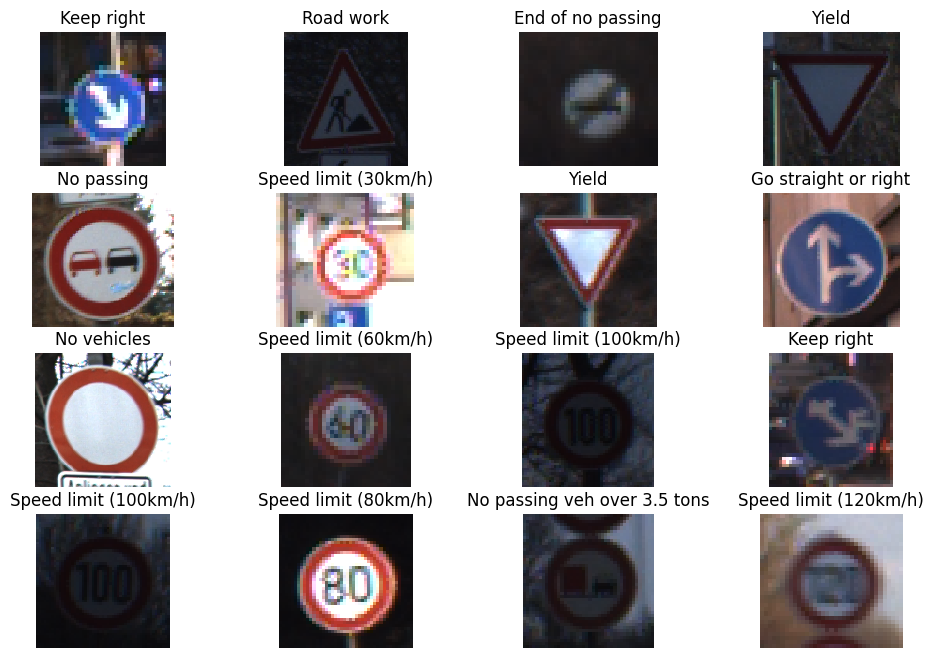

In [7]:
random_num_array = np.random.randint(len(test_dataset_df.Path), size=16)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 8))

for ax, num in zip(axs.ravel(), random_num_array):
    _img = img.imread(test_dataset_df.Path[num])
    class_id = test_dataset_df.ClassId[num]
    ax.set_title(f'{classes[class_id]}')
    ax.imshow(_img, interpolation='none')
    ax.axis("off")
# plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
plt.show()

## Loading and Preprocessing Dataset

In [8]:
class SimpleDatasetLoader:
    def __init__(self, preprocessors: list = None) -> None:
        """store the image preprocessor
        """
        self.preprocessors = preprocessors

        # if the preprocessors are None, initialize them as an empty list
        if self.preprocessors is None:
            self.preprocessors = []

    def load(self, class_id:pd.Series, paths:pd.Series, verbose=-1) -> tuple:
        """ intialize the list of features and labels
        """
        data = []
        labels = []

        # loop over the input images
        for i, (label, imagePath) in enumerate(zip(class_id, paths)):

            image = cv2.imread(imagePath)

            # check to see if preprocessors are not None
            if self.preprocessors is not None:
                # loop over the preprocessor and apply each to the image
                for p in self.preprocessors:
                    image = p.preprocess(image)

            # theat our processed image as a 'feature vector'
            # by updating the data list followed by the labels
            data.append(image)
            labels.append(label)

            # show an update every 'verbose' images
            if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
                print(f"[INFO] processed {i + 1}/{len(paths)}")

        # return a tuple of the data and labels
        return (np.array(data), np.array(labels))

In [9]:
# initialize the image preprocessor
sp = SimplePreprocessor(IMG_WIDTH, IMG_HEIGHT, inter=None)
iap = ImageToArrayPreprocessor()
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])

In [10]:
X_test, Y_test = sdl.load(class_id=test_dataset_df.ClassId,paths= test_dataset_df.Path, verbose=500)

[INFO] processed 500/12630
[INFO] processed 1000/12630
[INFO] processed 1500/12630
[INFO] processed 2000/12630
[INFO] processed 2500/12630
[INFO] processed 3000/12630
[INFO] processed 3500/12630
[INFO] processed 4000/12630
[INFO] processed 4500/12630
[INFO] processed 5000/12630
[INFO] processed 5500/12630
[INFO] processed 6000/12630
[INFO] processed 6500/12630
[INFO] processed 7000/12630
[INFO] processed 7500/12630
[INFO] processed 8000/12630
[INFO] processed 8500/12630
[INFO] processed 9000/12630
[INFO] processed 9500/12630
[INFO] processed 10000/12630
[INFO] processed 10500/12630
[INFO] processed 11000/12630
[INFO] processed 11500/12630
[INFO] processed 12000/12630
[INFO] processed 12500/12630


## Loading the saved model

In [11]:
# model = keras.models.load_model(SAVED_MODEL_PATH)
model = keras.models.load_model(SAVED_MODEL_PATH)


2023-02-17 19:16:06.793373: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-17 19:16:06.806616: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-17 19:16:06.806765: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-17 19:16:06.807321: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [12]:
preds = model.predict(X_test, batch_size=BATCH_SIZE)
preds[:10]

2023-02-17 19:16:08.050439: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600


159/395 [===========>..................] - ETA: 0s

2023-02-17 19:16:08.428260: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


395/395 [==============================] - 1s 967us/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0.,

In [13]:
preds = np.argmax(preds, axis=1)
preds[:10]

array([16,  1, 38, 33, 11, 38, 18, 12, 25, 35])

In [14]:
Y_test[:10]

array([16,  1, 38, 33, 11, 38, 18, 12, 25, 35])

In [15]:
print(classification_report(Y_test,
                            preds,
                            target_names=classes.values())
      )

                               precision    recall  f1-score   support

         Speed limit (20km/h)       0.92      0.75      0.83        60
         Speed limit (30km/h)       0.86      0.97      0.91       720
         Speed limit (50km/h)       0.89      0.97      0.93       750
         Speed limit (60km/h)       0.80      0.93      0.86       450
         Speed limit (70km/h)       0.94      0.92      0.93       660
         Speed limit (80km/h)       0.88      0.89      0.89       630
  End of speed limit (80km/h)       0.98      0.73      0.84       150
        Speed limit (100km/h)       0.95      0.81      0.87       450
        Speed limit (120km/h)       0.95      0.85      0.89       450
                   No passing       0.94      0.90      0.92       480
 No passing veh over 3.5 tons       0.98      0.96      0.97       660
 Right-of-way at intersection       0.94      0.94      0.94       420
                Priority road       0.94      0.92      0.93       690
     

In [16]:
def preprocess_image(image_path):
    print(image_path)

    img = cv2.imread(image_path)
    resize = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    # rgb_img = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)
    # plt.imshow(rgb_img)
    # plt.show()
    return np.expand_dims(resize / 255, 0)

1/1 [==============================] - 0s 10ms/step
[13]
1/1 [==============================] - 0s 10ms/step
[7]
1/1 [==============================] - 0s 12ms/step
[25]
1/1 [==============================] - 0s 11ms/step
[12]
1/1 [==============================] - 0s 10ms/step
[11]
1/1 [==============================] - 0s 10ms/step
[11]
1/1 [==============================] - 0s 10ms/step
[1]
1/1 [==============================] - 0s 10ms/step
[1]
1/1 [==============================] - 0s 10ms/step
[6]
1/1 [==============================] - 0s 11ms/step
[10]
1/1 [==============================] - 0s 10ms/step
[3]
1/1 [==============================] - 0s 10ms/step
[1]
1/1 [==============================] - 0s 10ms/step
[17]
1/1 [==============================] - 0s 10ms/step
[10]
1/1 [==============================] - 0s 11ms/step
[22]
1/1 [==============================] - 0s 11ms/step
[16]


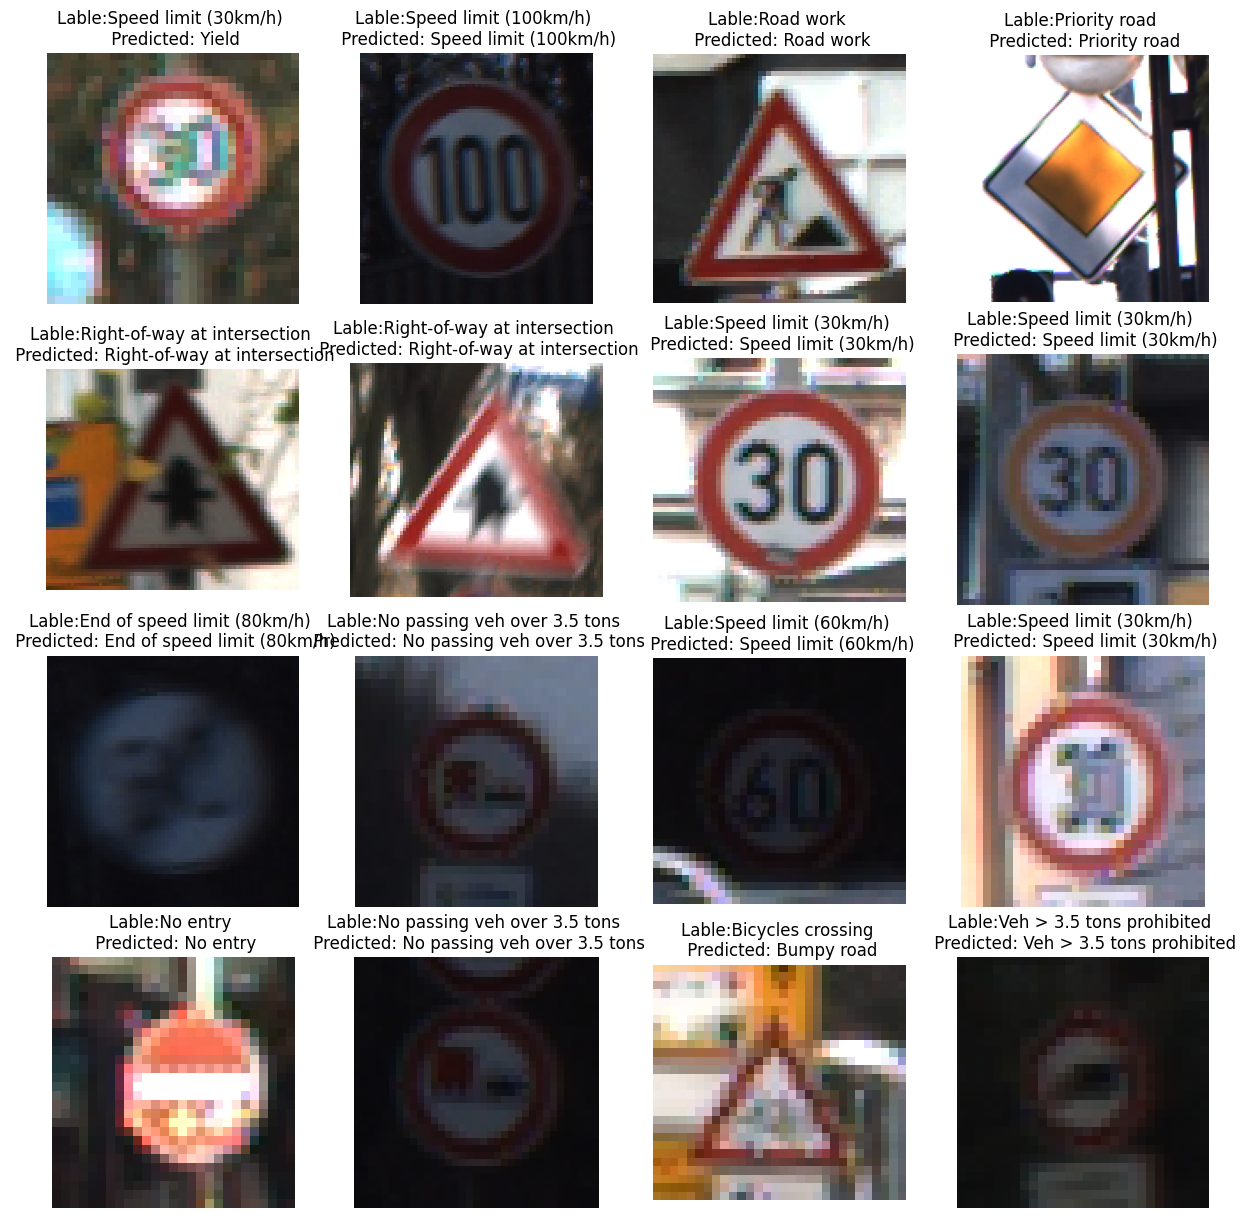

In [33]:
random_num_array = np.random.randint(len(test_dataset_df.Path), size=16)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for ax, num in zip(axs.ravel(), random_num_array):
    class_id = test_dataset_df.ClassId[num]
    img = test_dataset_df.Path[num]

    processed_img = preprocess_image(img)
    preds = model.predict(processed_img, batch_size=BATCH_SIZE)
    print(np.argmax(preds, axis=1))
    pred_label = classes[int(np.argmax(preds, axis=1))]

    ax.set_title(f'Lable:{classes[class_id]} \n Predicted: {pred_label}')

    img = cv2.imread(img)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_img)
    ax.axis("off")
# plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
plt.show()